In [59]:
import shutil
import random

from tqdm import tqdm
from matplotlib import pyplot as plt

import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
# Copy a couple jets to a different folder
for i in tqdm(range(1000), ncols=100):
    file_name = f"event_{str(i).zfill(7)}.npz"
    shutil.copyfile(f"./data/jets/{file_name}", f"./data/jets-sample/{file_name}")

100%|███████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.10it/s]


In [2]:
# Collect all features
events = []
for i in tqdm(range(1000), ncols=100):
    events.append(np.load(f"./data/jets-sample/event_{str(i).zfill(7)}.npz"))

100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7299.58it/s]


In [3]:
# Normalize all features
# They are:
#   p_T: transverse momentum
#   eta: angular coordinate
#   phi: angular coordinate
#   E  : energy
#   R  : sqrt(eta^2 + phi^2)

scaler = StandardScaler()

for event in events:
    scaler.fit(event["x"])

for i in range(len(events)):
    scaler.transform(events[i]["x"])

100%|██████████| 1000/1000 [00:00<00:00, 3658.87it/s]


(52562,)


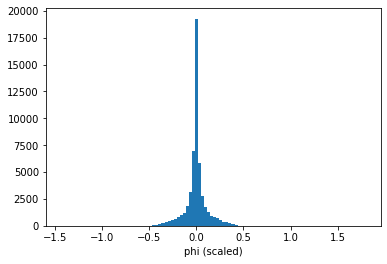

In [4]:
all_eta = np.array([])
for event in tqdm(events):
    all_eta = np.hstack((all_eta, event["x"][:, 1]))

print(all_eta.shape)

plt.hist(all_eta, bins=100);
plt.xlabel("phi (scaled)");

100%|██████████| 1000/1000 [00:00<00:00, 2564.21it/s]

(52562,)


Text(0.5, 0, 'phi (scaled)')

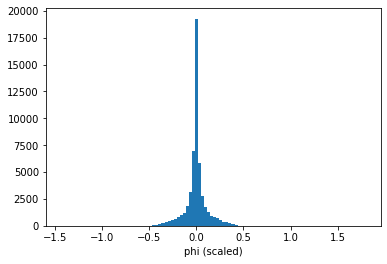

In [5]:
all_phi = np.array([])
for event in tqdm(events):
    all_phi = np.hstack((all_phi, event["x"][:, 2]))

print(all_phi.shape)

plt.hist(all_eta, bins=100);
plt.xlabel("phi (scaled)")

## Analysis

In [61]:
labels = ["Gluon", "Light quark", "W boson", "Z boson", "Top quark"]

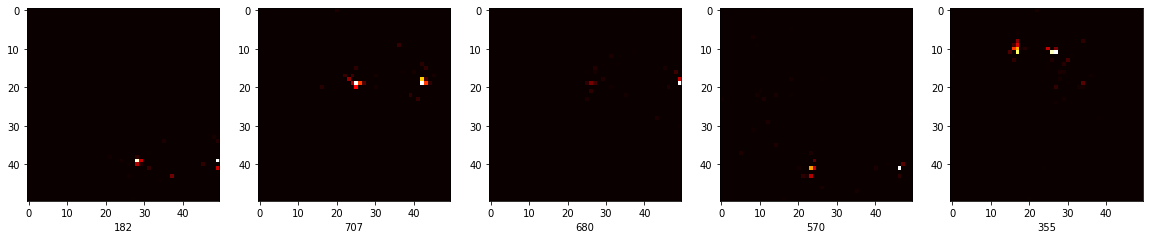

In [71]:
fig, axs = plt.subplots(1, 5)
fig.set_size_inches(20, 4)

for i in range(5):
    # Plot a single thing
    event_id = random.randrange(len(events))
    my_event = events[event_id]["x"]

    etas = my_event[:, 1]
    phis = my_event[:, 2]
    energies = my_event[:, 3]

    hist = np.histogram2d(etas, phis, weights=energies, bins=50)

    axs[i].imshow(hist[0], cmap="hot");
    axs[i].set_xlabel(event_id)